
1. You are provided the titanic dataset. Load the dataset and perform splitting into training and test sets with 70:30 ratio randomly using test train split.
2. Use the Logistic regression created from scratch (from the prev question) in this question as well.
3. Data cleaning plays a major role in this question. Report all the methods used by you in the ipynb.

--> 

i. Check for missing values

ii. Drop Columns & Handle missing values

iii. Create dummies for categorical features

you are free to perform other data cleaning to improve your results.



4. Report accuracy score, Confusion matrix, heat map, classifiaction report and any other metrics you feel useful.

dataset link : 
https://iiitaphyd-my.sharepoint.com/:f:/g/personal/apurva_jadhav_students_iiit_ac_in/Eictt5_qmoxNqezgQQiMWeIBph4sxlfA6jWAJNPnV2SF9Q?e=mQmYN0 

(titanic.csv)


In [3]:
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns

In [4]:
dataset = pd.read_csv("titanic.csv")

In [5]:
dataset.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
# dataset.isnull().apply(pd.Series.value_counts)


"""
We have to drop the Cabin column as there are too many null values.

"""
dataset.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

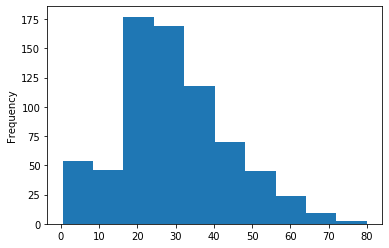

In [7]:
dataset["Age"].plot.hist()

In [8]:
dataset["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [9]:
dataset[["Pclass","Age"]].groupby("Pclass").count()

,Age
Pclass,
1,186
2,173
3,355


In [10]:
avg_age = dataset[["Pclass","Age"]].groupby("Pclass").sum()/dataset[["Pclass","Age"]].groupby("Pclass").count()

In [11]:
def fill_na(cols):
    if(pd.isnull(cols["Age"])):
        return avg_age["Age"][cols["Pclass"]]
    else:
        return cols["Age"]


dataset["Age"] = dataset[["Pclass","Age"]].apply(fill_na,axis=1)


In [12]:
dataset = dataset.drop(["Cabin"],axis=1)
dataset = dataset.dropna()

In [13]:
dataset["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
emb_list = dataset["Embarked"].astype("category").cat.categories.tolist()
sex_list = dataset["Sex"].astype("category").cat.categories.tolist()
replace_dict = {}
replace_dict["Embarked"] = {k:v for (k,v) in zip(emb_list,range(len(emb_list)))}
replace_dict["Sex"] = {k:v for (k,v) in zip(sex_list,range(len(sex_list)))}


In [15]:
dataset_copy = dataset.copy()
dataset_copy.replace(replace_dict,inplace=True)
dataset_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [16]:
dataset_copy.drop(["Name","Ticket","Fare"],axis=1,inplace=True)
Y = dataset_copy["Survived"].values
X = dataset_copy.loc[:,dataset_copy.columns!="Survived"].values


In [17]:
dataset_copy.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,1,22.0,1,0,2
1,2,1,1,0,38.0,1,0,0
2,3,1,3,0,26.0,0,0,2
3,4,1,1,0,35.0,1,0,2
4,5,0,3,1,35.0,0,0,2


In [18]:
def preprocess(X):
    X_copy = X.copy()
    for x in X_copy.T:
        avg = x.mean()
        xrange = np.amax(x) - np.amin(x) + 1
        x-=avg
        x/=xrange
    b = np.ones(shape=(len(X_copy),1))
    return np.append(X_copy,b,axis=1)

def get_res(X,W):
    return np.dot(X,W)

def sigmoid(Y_pred):
    return (1/(1+np.exp(-Y_pred)))

def update_weights(X,W,Y,learning_rate):
    Y_pred = get_res(X,W)
    Y_pred = sigmoid(Y_pred)
    N = len(X)   
    gradient = learning_rate * (np.dot(X.T,Y_pred - Y))
    W -= gradient    
    return W

def train(X,Y,learning_rate,itr): 
    W = np.zeros(len(X_train[0])+1)
    X_copy = preprocess(X)
    for i in range(itr):
        W = update_weights(X_copy,W,Y,learning_rate)
    return W

def predict(X,W):
    Y_pred = sigmoid(get_res(preprocess(X),W))
    return np.array([1 if i > 0.5 else 0 for i in Y_pred])

In [19]:
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size = 0.3,random_state =42)

In [28]:
W = train(X_train,Y_train,0.01,4000)  
Y_pred = predict(X_test,W)

In [29]:
accuracy_score(Y_test,Y_pred)

0.8127340823970037

In [30]:
confusion_matrix(Y_test,Y_pred)

array([[144,  23],
       [ 27,  73]])

In [31]:
print(classification_report(Y_test,Y_pred,target_names = ["Not Survived","Survived"]))

              precision    recall  f1-score   support

Not Survived       0.84      0.86      0.85       167
    Survived       0.76      0.73      0.74       100

    accuracy                           0.81       267
   macro avg       0.80      0.80      0.80       267
weighted avg       0.81      0.81      0.81       267



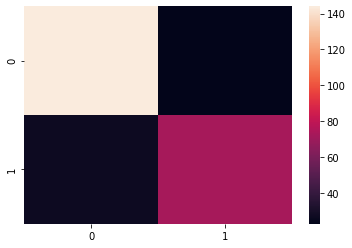

In [56]:
sns.heatmap(confusion_matrix(Y_test,Y_pred))